In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Paths
new_csv = './heart_data.csv'
sqlite_db = './medical_heart_data.db'

# 2)  Consume the CSV and the SQLite DB data
df_from_csv = pd.read_csv(new_csv)

with sqlite3.connect(sqlite_db) as conn:
    df_from_db = pd.read_sql_query('SELECT * FROM medical_data', conn)

# 3) Combine the two sources into a single dataframe
df_combined = pd.concat([df_from_csv, df_from_db], ignore_index=True)

# 4) Quick sanity‑check
print(f'Combined rows:  {len(df_combined):5d}')
print('\nCombined dataframe preview:')
df_combined.head()


Combined rows:   1319

Combined dataframe preview:


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


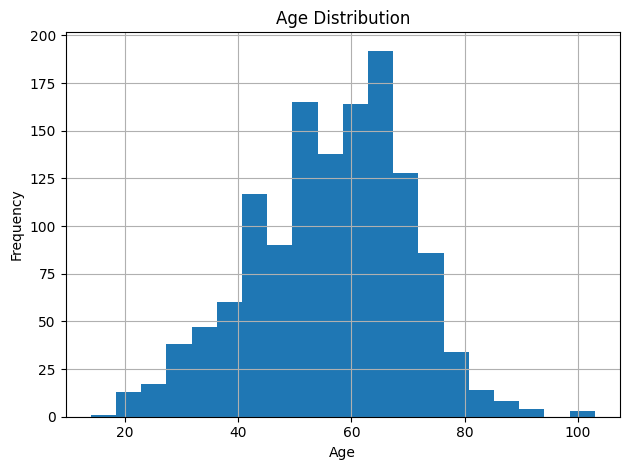

In [3]:
# 2.1 Age distribution
plt.figure()
df_combined['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

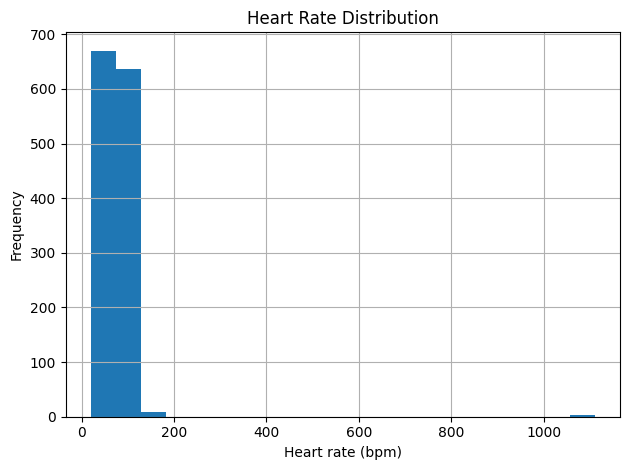

In [4]:
# 2.2 Heart‑rate distribution
plt.figure()
df_combined['Heart rate'].hist(bins=20)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.show()

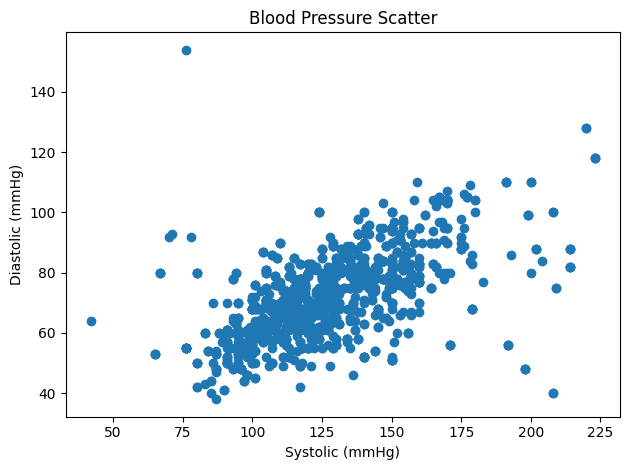

In [5]:
# 2.3 Systolic vs Diastolic scatter
plt.figure()
plt.scatter(df_combined['Systolic blood pressure'], df_combined['Diastolic blood pressure'])
plt.title('Blood Pressure Scatter')
plt.xlabel('Systolic (mmHg)')
plt.ylabel('Diastolic (mmHg)')
plt.tight_layout()
plt.show()

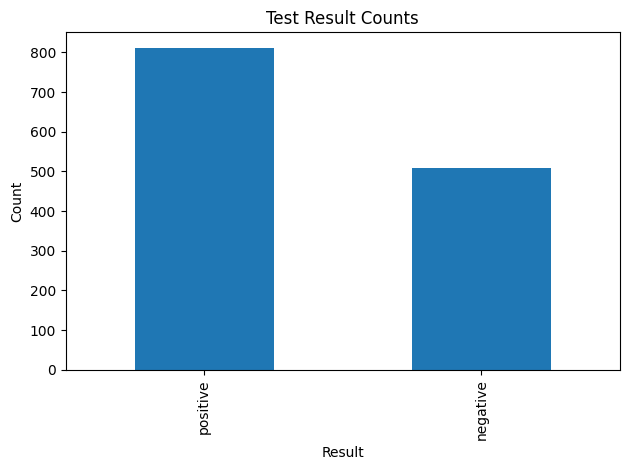

In [6]:
# 2.4 Result count bar‑chart
plt.figure()
df_combined['Result'].value_counts().plot(kind='bar')
plt.title('Test Result Counts')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()